In [54]:
import scipy.fft
from skimage.filters import median, gaussian
from scipy.signal import savgol_filter
import tifffile
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
from tqdm.auto import tqdm

In [16]:
img = tifffile.imread('/mnt/LSDF/projects/code-vita/BM_beamtimes/2022_02_P23/27-02/trichogramma/001/pr-pag-all/scan_0106-pr-pag-2p0.tif')

In [49]:
from scipy.signal import lfilter

n = 10  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

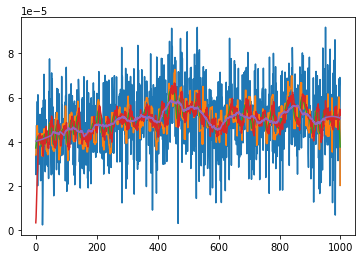

In [55]:
plt.plot(img[:1000, 500, 500])
plt.plot(median(img[:1000, 500, 500], np.ones(7)))
plt.plot(gaussian(img[:1000, 500, 500], sigma=4))
plt.plot(lfilter(b,a,img[:1000, 500, 500]))
plt.plot(savgol_filter(img[:1000, 500, 500], 101, 2))

In [28]:
new_img_m = np.zeros_like(img)
for i in tqdm(range(img.shape[1])):
    for j in range(img.shape[2]):
        new_img_m[:1000, i, j] = median(img[:1000, i, j], np.ones(7))

  0%|          | 0/516 [00:00<?, ?it/s]

In [29]:
new_img_g = np.zeros_like(img)
for i in tqdm(range(img.shape[1])):
    for j in range(img.shape[2]):
        new_img_g[:1000, i, j] = gaussian(img[:1000, i, j], sigma=4)

  0%|          | 0/516 [00:00<?, ?it/s]

In [51]:
new_img_l = np.zeros_like(img)
for i in tqdm(range(img.shape[1])):
    for j in range(img.shape[2]):
        new_img_l[:1000, i, j] = lfilter(b,a,img[:1000, i, j])

  0%|          | 0/516 [00:00<?, ?it/s]

In [56]:
new_img_l = np.zeros_like(img)
for i in tqdm(range(img.shape[1])):
    for j in range(img.shape[2]):  
        new_img_l[:1000, i, j] = savgol_filter(img[:1000, i, j], 101, 2)

  0%|          | 0/516 [00:00<?, ?it/s]

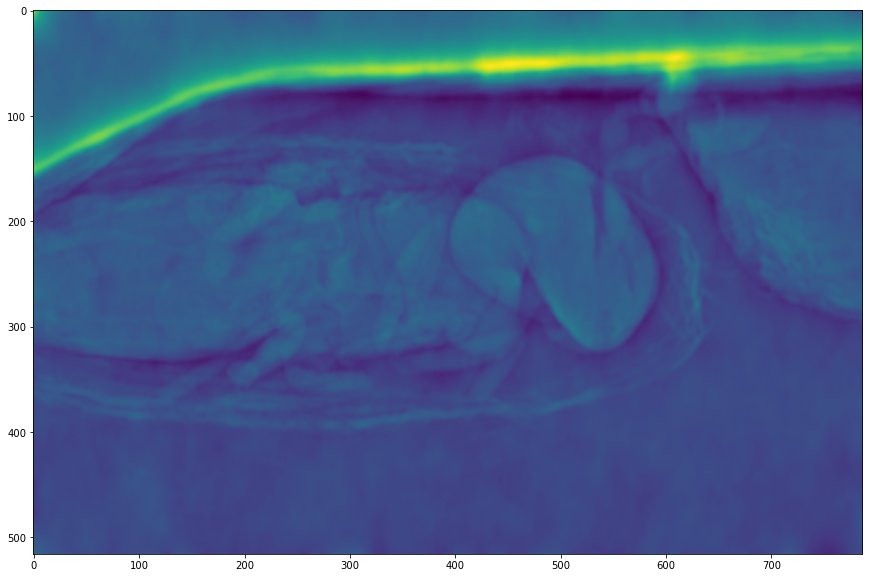

In [32]:
plt.figure(figsize=(16, 10))
plt.imshow(img[100])

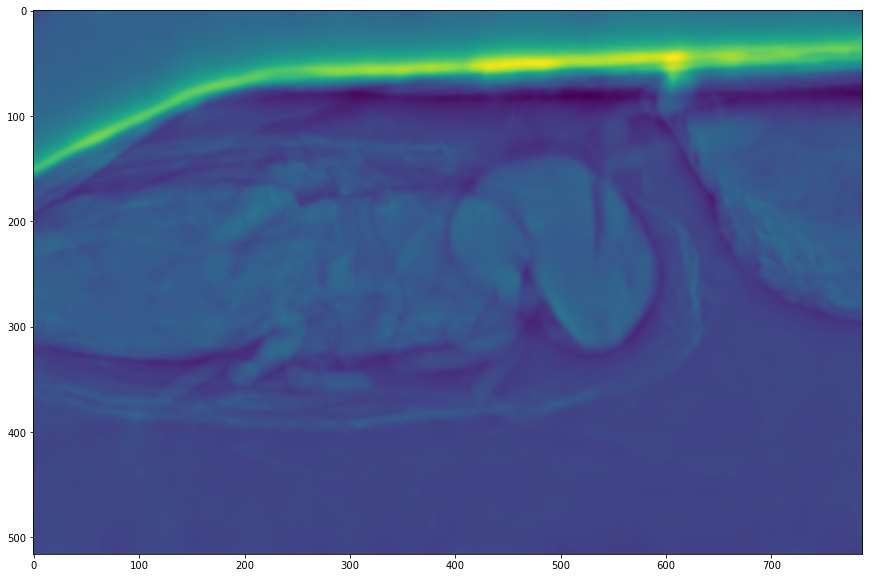

In [33]:
plt.figure(figsize=(16, 10))
plt.imshow(new_img_g[100])

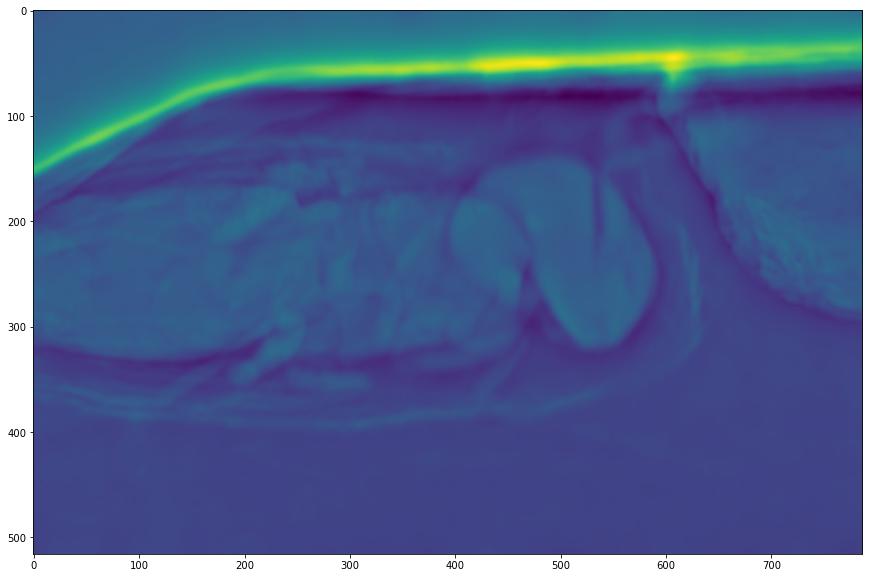

In [57]:
plt.figure(figsize=(16, 10))
plt.imshow(new_img_l[100])

In [82]:
nim100 = new_img_l[100] + (new_img_m[100] - img[100]) - gaussian(new_img_m[100] - img[100], sigma=1)
nim101 = new_img_l[101] + (new_img_m[101] - img[101]) - gaussian(new_img_m[101] - img[101], sigma=10)

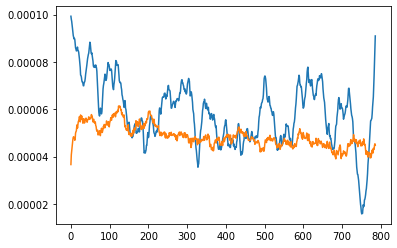

In [85]:
plt.plot(img[100, 500])
plt.plot(nim100[500, ])

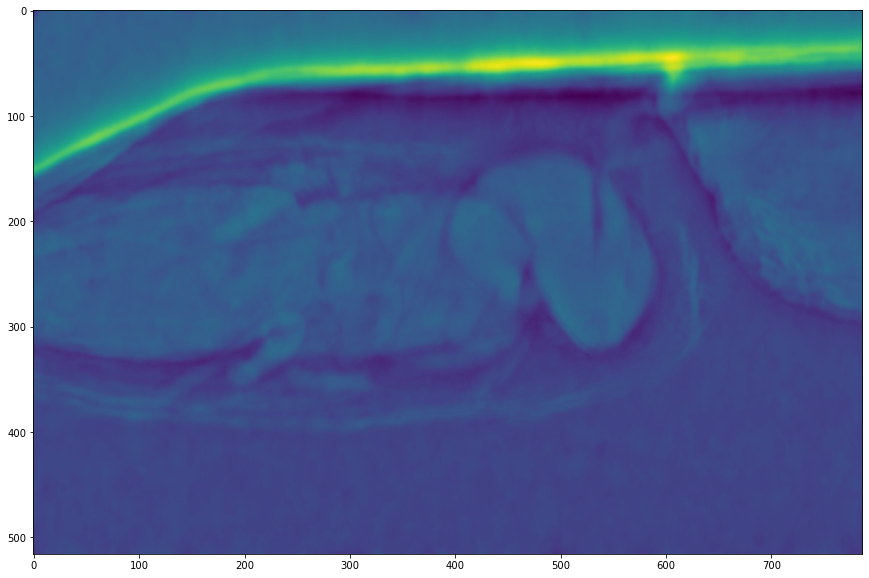

In [67]:
plt.figure(figsize=(16, 10))
plt.imshow(new_img_l[100] + (new_img_m[100] - img[100]) - gaussian(new_img_m[100] - img[100], sigma=10))

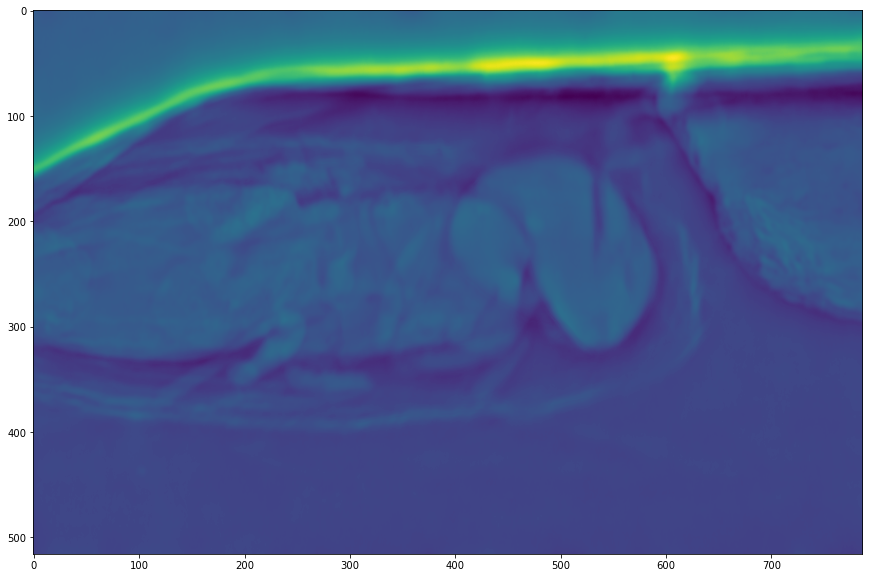

In [84]:
plt.figure(figsize=(16, 10))
plt.imshow(nim100)

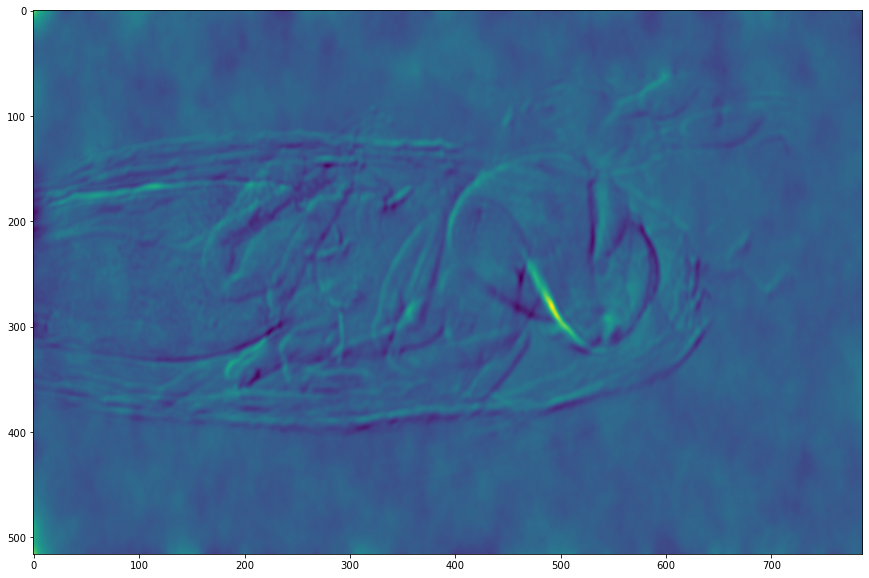

In [37]:
plt.figure(figsize=(16, 10))
plt.imshow(new_img_g[100] - new_img_g[101])